In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import optimize
from scipy.optimize import curve_fit
import scipy.special as sf
%matplotlib notebook

In [2]:
df = pd.read_csv('Data/Zmumu_Run2011A.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10583 entries, 0 to 10582
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     10583 non-null  int64  
 1   Event   10583 non-null  int64  
 2   pt1     10583 non-null  float64
 3   eta1    10583 non-null  float64
 4   phi1    10583 non-null  float64
 5   Q1      10583 non-null  int64  
 6   dxy1    10583 non-null  float64
 7   iso1    10583 non-null  float64
 8   pt2     10583 non-null  float64
 9   eta2    10583 non-null  float64
 10  phi2    10583 non-null  float64
 11  Q2      10583 non-null  int64  
 12  dxy2    10583 non-null  float64
 13  iso2    10583 non-null  float64
dtypes: float64(10), int64(4)
memory usage: 1.1 MB


In [4]:
df.describe()

,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2
count,10583.000000,1.058300e+04,10583.000000,10583.000000,10583.000000,10583.000000,10583.000000,10583.000000,10583.000000,10583.000000,10583.000000,10583.000000,10583.000000,10583.000000
mean,169053.488897,4.519956e+08,38.362629,-0.279084,-0.229458,-0.029387,0.006933,1.489141,38.650208,0.082782,0.257281,0.037324,0.009282,1.714888
std,3980.798941,3.981867e+08,14.449283,1.351192,1.800990,0.999615,0.078544,6.230437,15.940760,0.869713,1.790604,0.999350,1.731125,6.784883
min,160957.000000,8.922000e+04,3.463690,-2.437470,-3.141400,-1.000000,-3.588030,0.000000,3.266150,-2.427980,-3.141500,-1.000000,-2.005220,0.000000
25%,166438.000000,1.304824e+08,30.106850,-1.430290,-1.766595,-1.000000,-0.051488,0.000000,29.977700,-0.563170,-1.251545,-1.000000,-0.067880,0.000000
50%,167102.000000,3.374235e+08,38.831000,-0.558315,-0.427421,-1.000000,0.012864,0.000000,38.902900,0.081718,0.418774,1.000000,-0.013994,0.000000
75%,173692.000000,6.038094e+08,45.038250,1.094200,1.302915,1.000000,0.067039,0.482468,45.189900,0.739197,1.817075,1.000000,0.052401,0.526352
max,173692.000000,1.586013e+09,269.080000,2.099680,3.141360,1.000000,2.677580,184.728000,528.434000,2.099180,3.140920,1.000000,177.931000,151.295000


In [5]:
df.isnull().sum()

Run      0
Event    0
pt1      0
eta1     0
phi1     0
Q1       0
dxy1     0
iso1     0
pt2      0
eta2     0
phi2     0
Q2       0
dxy2     0
iso2     0
dtype: int64

<IPython.core.display.Javascript object>


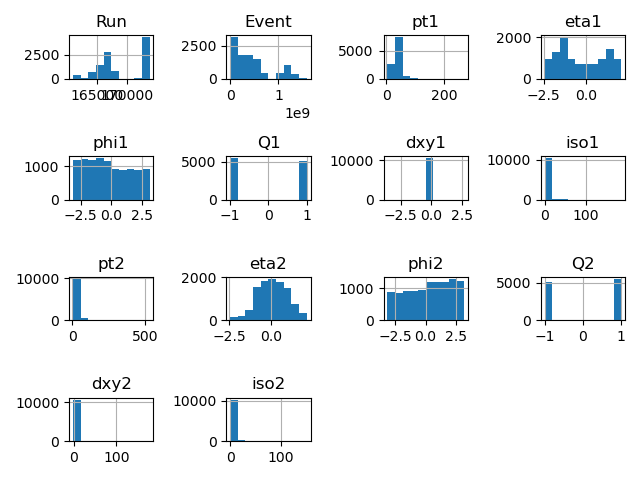

In [6]:
df.hist()
plt.tight_layout();

In [7]:
minv_mu = np.sqrt(2*df.pt1*df.pt2 * (np.cosh(df.eta1 - df.eta2) - np.cos(df.phi1 - df.phi2) ))
df['M'] = minv_mu
df.head(3)

,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2,M
0,165617,74969122,54.7055,-0.432396,2.57421,1,-0.074544,0.499921,34.2464,-0.988480,-0.498704,-1,0.071222,3.42214,89.885744
1,165617,75138253,24.5872,-2.052200,2.86657,-1,-0.055437,0.000000,28.5389,0.385163,-1.991170,1,0.051477,0.00000,88.810987
2,165617,75887636,31.7386,-2.259450,-1.33229,-1,0.087917,0.000000,30.2344,-0.468419,1.883310,1,-0.087639,0.00000,88.472502


<IPython.core.display.Javascript object>


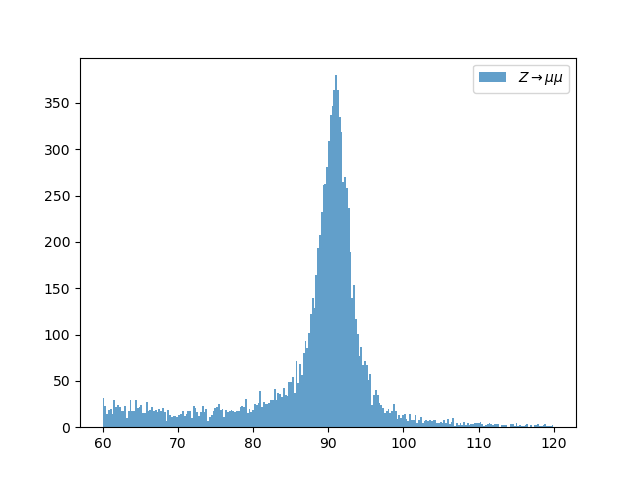

In [8]:
fig = plt.figure('Z Decay')
plt.hist(minv_mu, bins=250, alpha=0.7, label=r'$Z\rightarrow \mu\mu$')
plt.legend();

In [9]:
def breitwigner_rel(M, gamma, M_z, a, b, c):
    
    little_gamma = np.sqrt( M_z**2*(M_z**2 + gamma**2) )
    
    k = (2*np.sqrt(2)*M_z*gamma*little_gamma)/(np.pi*np.sqrt(M_z**2 + little_gamma) )
    
    f = k / ( (M**2 - M_z**2)**2 + M_z**2 * gamma**2) 
    
    return a*M + b + c*f

<IPython.core.display.Javascript object>


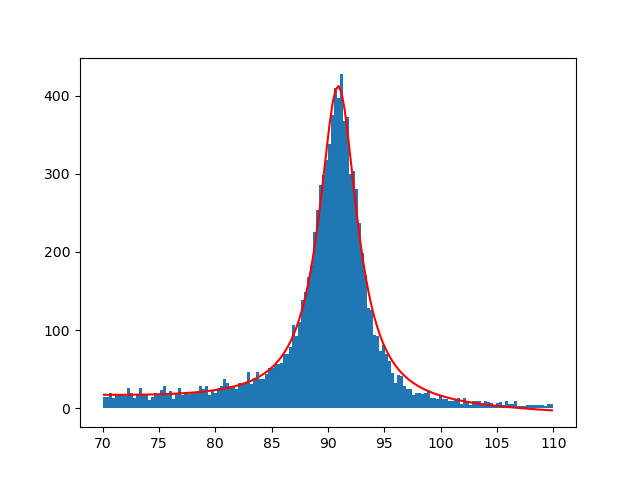

[ 70.13333333  70.4         70.66666667  70.93333333  71.2
  71.46666667  71.73333333  72.          72.26666667  72.53333333
  72.8         73.06666667  73.33333333  73.6         73.86666667
  74.13333333  74.4         74.66666667  74.93333333  75.2
  75.46666667  75.73333333  76.          76.26666667  76.53333333
  76.8         77.06666667  77.33333333  77.6         77.86666667
  78.13333333  78.4         78.66666667  78.93333333  79.2
  79.46666667  79.73333333  80.          80.26666667  80.53333333
  80.8         81.06666667  81.33333333  81.6         81.86666667
  82.13333333  82.4         82.66666667  82.93333333  83.2
  83.46666667  83.73333333  84.          84.26666667  84.53333333
  84.8         85.06666667  85.33333333  85.6         85.86666667
  86.13333333  86.4         86.66666667  86.93333333  87.2
  87.46666667  87.73333333  88.          88.26666667  88.53333333
  88.8         89.06666667  89.33333333  89.6         89.86666667
  90.13333333  90.4         90.66666667  90.9

In [10]:
lowerlimit = 70.0
upperlimit = 110.0
bins = 150
fig = plt.figure()
histogram_mu = plt.hist(minv_mu, bins=bins, range=(lowerlimit, upperlimit))

y_mu = histogram_mu[0]
x_mu = 0.5*(histogram_mu[1][0:-1] + histogram_mu[1][1:])
print(x_mu)
y_mu_error = np.sqrt(y_mu)

In [11]:
initials = [2.5, 91, -2, 200, 13000]
best_mu, covariance_mu = curve_fit(breitwigner_rel, x_mu, y_mu, p0=initials, absolute_sigma=True)
print(best_mu)

plt.plot(x_mu,breitwigner_rel(x_mu,*best_mu),'r-');

[ 4.09922788e+00  9.09013151e+01 -4.73031339e-01  4.55070749e+01
  2.63642711e+03]


In [12]:
chisq = np.sum((y_mu - breitwigner_rel(x_mu, *best_mu))**2/((y_mu_error)**2))
dof = len(y_mu) - len(best_mu)
print('reduced chi2: ',chisq/dof)

pvalue = sf.gammaincc(dof/2, chisq/2)
print('pvalue: ',pvalue)

reduced chi2:  1.957946783115645
pvalue:  4.678587258134474e-11


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10583 entries, 0 to 10582
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     10583 non-null  int64  
 1   Event   10583 non-null  int64  
 2   pt1     10583 non-null  float64
 3   eta1    10583 non-null  float64
 4   phi1    10583 non-null  float64
 5   Q1      10583 non-null  int64  
 6   dxy1    10583 non-null  float64
 7   iso1    10583 non-null  float64
 8   pt2     10583 non-null  float64
 9   eta2    10583 non-null  float64
 10  phi2    10583 non-null  float64
 11  Q2      10583 non-null  int64  
 12  dxy2    10583 non-null  float64
 13  iso2    10583 non-null  float64
 14  M       10583 non-null  float64
dtypes: float64(11), int64(4)
memory usage: 1.2 MB


<IPython.core.display.Javascript object>


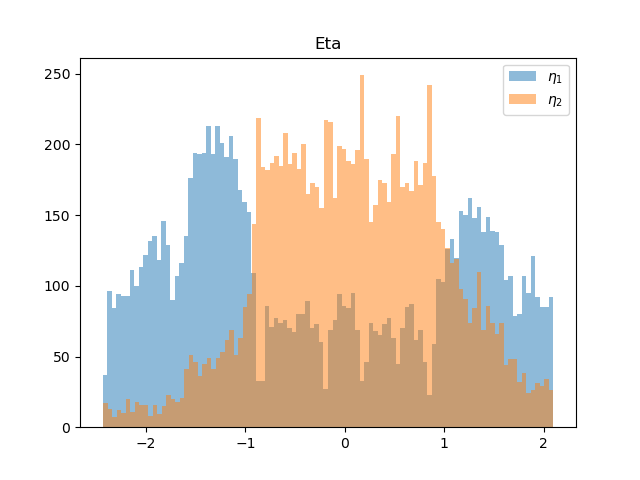

In [14]:
fig = plt.figure('eta')
plt.hist(df.eta1, bins=100, alpha=0.5, label=r'$\eta_1$')
plt.hist(df.eta2, bins=100, alpha=0.5, label=r'$\eta_2$')

plt.xlabel=(r'$\eta$')
plt.title('Eta')
plt.legend();